In [52]:
# call this from terminal to sync
# rsync -avz --progress bella@lupm-slurm.lupm.in2p3.fr:/home/bella/mini_reconstruction_tool ~/uni/1_master_thesis/tools/output_remote


import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------
# 1️⃣ Directory with your npz files
# -----------------------------
data_dir = Path("/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/9psd/output_class")  # adjust path if needed
npz_files = sorted(data_dir.glob("*_sample_*.npz"))
best_fit = "/Users/bellamarco01/uni/1_master_thesis/tools/output_remote/mini_reconstruction_tool/9psd/output_class/bestfit.npz"

# -----------------------------
# 2️⃣ Loop over samples and collect data
# -----------------------------
all_z = []
all_fEDE = []
all_H =[]
all_ell = []
all_cl_tt = []
all_weights = []

for npz_file in npz_files:
    data = np.load(npz_file)
    all_z.append(data["z"])
    all_fEDE.append(data["f_EDE"])
    all_H.append(data["H"])
    all_ell.append(data["ell"])
    all_cl_tt.append(data["cl_tt"])
    all_weights.append(data["weight"])

data = np.load(best_fit)
z_bf = data["z"]
f_ede_bf = data["f_EDE"]
H_bf = data["H"]
ell_bf = data["ell"]
cl_tt_bf = data["cl_tt"]

all_fEDE = np.array(all_fEDE)      # shape: (N_samples, N_z)
all_H = np.array(all_H)      # shape: (N_samples, N_z)
all_weights = np.array(all_weights)

# -----------------------------
# 3️⃣ Plot f_EDE(z)
# -----------------------------
# plt.figure(figsize=(6,4))
# for i, fEDE in enumerate(all_fEDE):
#     plt.plot(all_z[i], fEDE, label=f"Sample {i}", alpha=0.7)
# plt.xlabel("z")
# plt.ylabel("f_EDE(z)")
# plt.title("Early Dark Energy Fraction")
# plt.yscale("linear")
# plt.xscale("log")
# #plt.legend()
# plt.xlim(10**2,10**5)
# plt.tight_layout()
# plt.show()

# # -----------------------------
# # 4 Plot H(z)
# # -----------------------------
# plt.figure(figsize=(6,4))
# for i, H in enumerate(all_H):
#     plt.plot(all_z[i], H, label=f"Sample {i}", alpha=0.7)
# plt.xlabel("z")
# plt.ylabel("H(z)")
# plt.title("Hubble r8")
# plt.yscale("log")
# plt.xscale("log")
# #plt.legend()
# plt.tight_layout()
# plt.show()



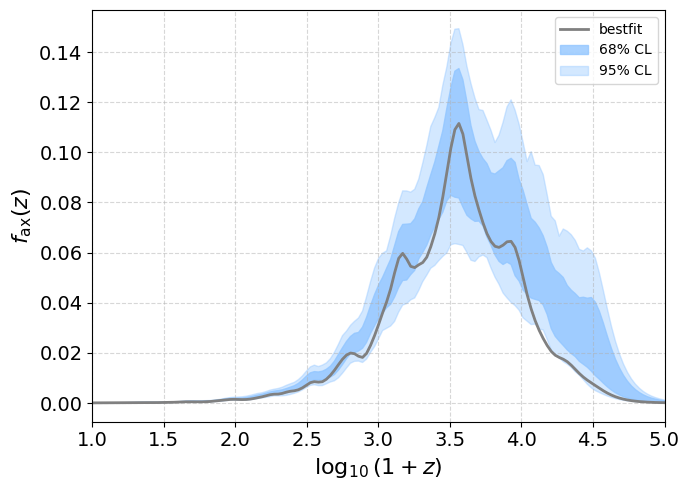

Saved 9psd_fede.pdf to /Users/bellamarco01/uni/1_master_thesis/thesis/plots


In [80]:
def weighted_percentile(values, weights, percentiles):
    """
    values: (N_samples,)
    weights: (N_samples,)
    percentiles: list or array in [0, 100]
    """
    sorter = np.argsort(values)
    values = values[sorter]
    weights = weights[sorter]

    cdf = np.cumsum(weights)
    cdf /= cdf[-1]

    return np.interp(np.array(percentiles) / 100.0, cdf, values)


lower_68 = np.zeros(all_fEDE.shape[1])
upper_68 = np.zeros_like(lower_68)
lower_95 = np.zeros_like(lower_68)
upper_95 = np.zeros_like(lower_68)

for j in range(all_fEDE.shape[1]):  # loop over z
    vals = all_fEDE[:, j]
    w = all_weights

    lower_68[j], upper_68[j] = weighted_percentile(vals, w, [16, 84])
    lower_95[j], upper_95[j] = weighted_percentile(vals, w, [2.5, 97.5])



from plotting.plotting import new_fig, COLORS
fig, ax = new_fig()
# Plot
# Median line
#plt.plot(np.log10(1 + Z[0]), median_rho,'black',alpha=0.5, lw=2.5, label="Median",fontsize=18)
# 68% confidence interval
# ax.plot(np.log10(1 + z_bf), f_ede_bf,label="bestfit",color=COLORS[2], linewidth=2.5)
ax.plot_single(np.log10(1 + z_bf), f_ede_bf,label="bestfit")
ax.fill_between(np.log10(1 + all_z[0]), lower_68, upper_68,alpha=0.8,  color= COLORS[0],label="68% CL")
ax.fill_between(np.log10(1 + all_z[0]), lower_95, upper_95,alpha=0.4, color= COLORS[0],label="95% CL")
# 95% confidence interval
# Optional: overlay individual weighted samples
#for i in range(Z.shape[0]):
#    plt.plot(np.log10(1 + Z[i]), RHO[i], color='lightblue', alpha=0.01*alphas[i])

plt.xlabel(r"$\log_{10}(1+z)$")
plt.ylabel(r"$f_\text{ax}(z)$")
#plt.yscale('log')
# plt.title("", fontsize=20)
plt.xlim(1,5)
#plt.ylim(1e-3,1e5)
plt.legend()
plt.tight_layout()
plt.show()
fig.save("9psd_fede")

In [73]:
def weighted_percentile(values, weights, percentiles):
    """
    values: (N_samples,)
    weights: (N_samples,)
    percentiles: list or array in [0, 100]
    """
    sorter = np.argsort(values)
    values = values[sorter]
    weights = weights[sorter]

    cdf = np.cumsum(weights)
    cdf /= cdf[-1]

    return np.interp(np.array(percentiles) / 100.0, cdf, values)

# Prepare arrays for statistics
z_list = []
H_list = []
# max_points=500

# for i in range(len(data["z"])):
#     z = np.array(data["z"][i], dtype=np.float64)
#     H = np.array(data["H"][i], dtype=np.float64)

#     # Downsample to max_points if necessary
#     if len(z) > max_points:
#         step = len(z) // max_points
#         z = z[::step]
#         H = H[::step]

#     z_list.append(z)
#     H_list.append(H)

# # Stack into 2D arrays: shape = (Nsamples, Npts)
# Z = np.stack(z_list)
# H = np.stack(H_list)


lower_68_H = np.zeros(all_H.shape[1])
upper_68_H = np.zeros_like(lower_68)
lower_95_H = np.zeros_like(lower_68)
upper_95_H = np.zeros_like(lower_68)

for j in range(all_H.shape[1]):  # loop over z
    vals = all_H[:, j]
    w = all_weights

    lower_68_H[j], upper_68_H[j] = weighted_percentile(vals, w, [16, 84])
    lower_95_H[j], upper_95_H[j] = weighted_percentile(vals, w, [2.5, 97.5])



from plotting.plotting import new_fig, COLORS



In [74]:
from classy import Class
LambdaCDM = Class()
LambdaCDM.set({'omega_b':0.02237,
               'omega_cdm':0.1200,
               '100theta_s':1.04092,
               'A_s':3.044e-10,
               'n_s':0.9649,
               'tau_reio':0.0544,
               }
               )

#LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

bg = LambdaCDM.get_background()
z_lcdm = bg['z'] #redshift
H_lcdm = bg['H [1/Mpc]'] #hubble rate

NPTS = 500  # choose 100, 200, 300… depending on how small you want the file

idx = np.round(np.linspace(0, len(z_lcdm) - 1, NPTS)).astype(int)

z_small_lcdm       = z_lcdm[idx]
H_small_lcdm  = H_lcdm[idx]

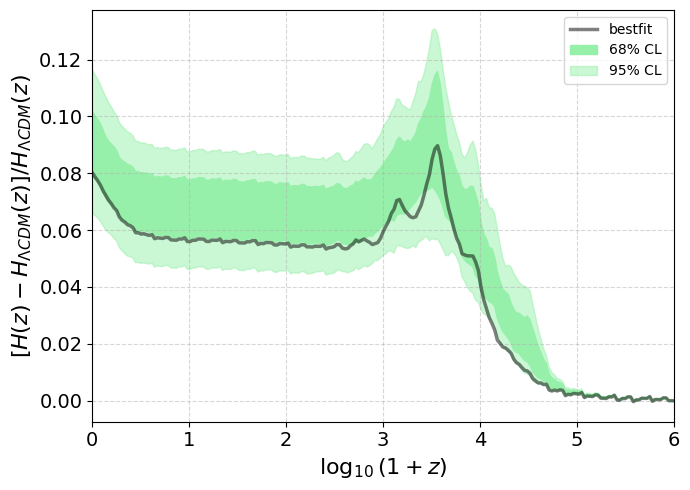

Saved 9psd_H.pdf to /Users/bellamarco01/uni/1_master_thesis/thesis/plots


In [79]:
# Plot
fig, ax = new_fig()

# fig, ax = new_fig()
# Plot
# Median line
#plt.plot(np.log10(1 + Z[0]), median_rho,'black',alpha=0.5, lw=2.5, label="Median",fontsize=18)
# 68% confidence interval
# ax.plot(np.log10(1 + z_bf), H_bf,label="bestfit",color=COLORS[2], linewidth=2.5)

# ax.fill_between(np.log10(1 + all_z[0]), lower_68, upper_68,alpha=0.8,  color= COLORS[0],label="68% CL")
# ax.fill_between(np.log10(1 + all_z[0]), lower_95, upper_95,alpha=0.4, color= COLORS[0],label="95% CL")
# 95% confidence interval
# Optional: overlay individual weighted samples
#for i in range(Z.shape[0]):
#    plt.plot(np.log10(1 + Z[i]), RHO[i], color='lightblue', alpha=0.01*alphas[i])

# plt.xlabel(r"$\log_{10}(1+z)$")
# plt.ylabel(r"$H(z)$")
# plt.yscale('log')
# # plt.title("", fontsize=20)
# plt.xlim(1,5)
# #plt.ylim(1e-3,1e5)
# plt.legend()
# plt.tight_layout()
# plt.show()


plt.plot(np.log10(1 + all_z[0]), (H_bf-H_small_lcdm)/H_small_lcdm, color='black',alpha=0.5, lw=2.5, label="bestfit")
# 95% confidence interval
# 68% confidence interval
plt.fill_between(np.log10(1 + all_z[0]), (lower_68_H-H_small_lcdm)/H_small_lcdm, (upper_68_H-H_small_lcdm)/H_small_lcdm, color= COLORS[1], label="68% CL")
# Median line
plt.fill_between(np.log10(1 + all_z[0]), (lower_95_H-H_small_lcdm)/H_small_lcdm, (upper_95_H-H_small_lcdm)/H_small_lcdm, alpha=0.5,color= COLORS[1], label="95% CL")

plt.xlabel(r"$\log_{10}(1+z)$")
#plt.yscale('log')
plt.ylabel(r"$[H(z)-H_{\Lambda CDM}(z)]/H_{\Lambda CDM}(z)$")
plt.xlim(0,6)
# plt.title(r"Uncertainty in $H(z)$ vs $\Lambda CDM$ bestfit", fontsize=25)
#plt.ylim(1e1,1e4)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

fig.save("9psd_H")